# Evaluate significance of principal component loadings classes differences

Script related to figure s5

Aim:
- Evaluate significance of PC loading differences

In [1]:
setwd("~/Documents/PhD/Software/Scripts/OVCT/1.REBUTTAL/0.Figures/5/0.Scripts/")

## Load normalised enrichment scores data matched

In [2]:
data <- read.table('../1.Data/HallmarksStromaImmune_NACT_matched_NES.txt',
                   row.names='Term',
                   header=T,
                   sep='\t')

In [3]:
data_pca = t(data)

### Plots

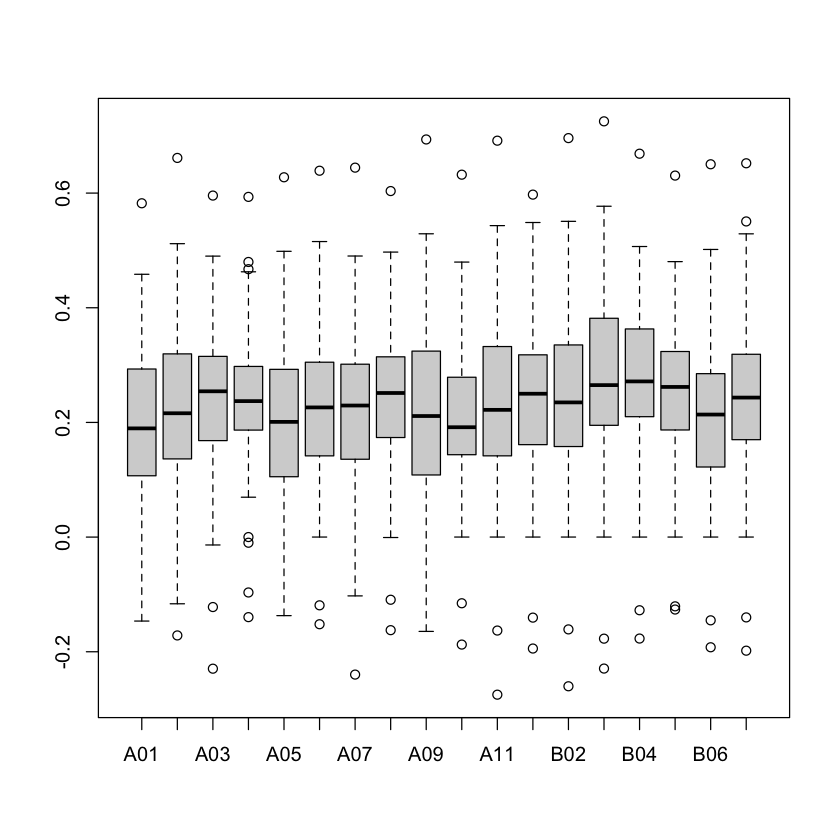

In [4]:
boxplot(data,
        col="light gray")

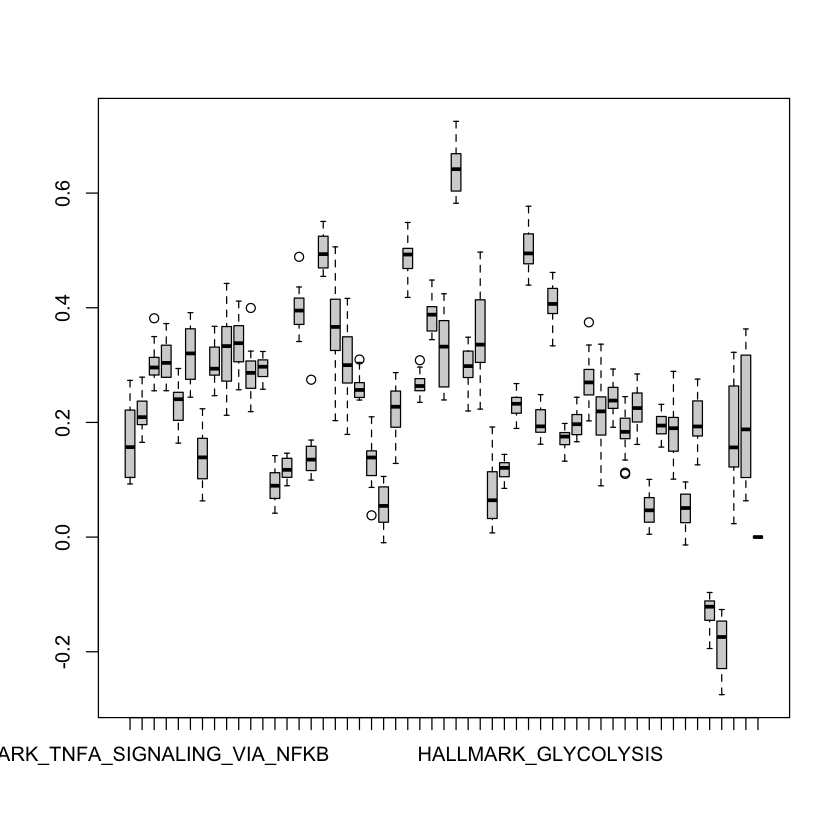

In [5]:
boxplot(t(data),
        col="light gray")

## PCA

### princomp on covmatrix

In [6]:
pca1 = princomp(covmat=cov(data_pca))

In [7]:
summary(pca1)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     0.2335700 0.1380809 0.08165839 0.06679208 0.06258393
Proportion of Variance 0.5216876 0.1823238 0.06376437 0.04266055 0.03745434
Cumulative Proportion  0.5216876 0.7040114 0.76777579 0.81043634 0.84789068
                           Comp.6     Comp.7     Comp.8    Comp.9    Comp.10
Standard deviation     0.05376616 0.05107378 0.04803316 0.0399409 0.03864417
Proportion of Variance 0.02764360 0.02494436 0.02206270 0.0152550 0.01428054
Cumulative Proportion  0.87553428 0.90047864 0.92254134 0.9377963 0.95207687
                          Comp.11    Comp.12    Comp.13     Comp.14     Comp.15
Standard deviation     0.03394716 0.03122917 0.02759086 0.026064937 0.024285677
Proportion of Variance 0.01102005 0.00932604 0.00727959 0.006496655 0.005639971
Cumulative Proportion  0.96309692 0.97242296 0.97970255 0.986199204 0.991839175
                           Comp.16     Com

### prcomp on data (with n<p)

In [8]:
pca2 = prcomp(data_pca)

In [9]:
summary(pca2)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     0.2336 0.1381 0.08166 0.06679 0.06258 0.05377 0.05107
Proportion of Variance 0.5217 0.1823 0.06376 0.04266 0.03745 0.02764 0.02494
Cumulative Proportion  0.5217 0.7040 0.76778 0.81044 0.84789 0.87553 0.90048
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.04803 0.03994 0.03864 0.03395 0.03123 0.02759 0.02606
Proportion of Variance 0.02206 0.01525 0.01428 0.01102 0.00933 0.00728 0.00650
Cumulative Proportion  0.92254 0.93780 0.95208 0.96310 0.97242 0.97970 0.98620
                          PC15    PC16    PC17      PC18
Standard deviation     0.02429 0.02312 0.01786 7.007e-17
Proportion of Variance 0.00564 0.00511 0.00305 0.000e+00
Cumulative Proportion  0.99184 0.99695 1.00000 1.000e+00

In [10]:
names(pca2)

[1] "sdev"     "rotation" "center"   "scale"    "x"

### Same results (with sometimes different sign)

In [11]:
for(pw in 1:nrow(data_pca)){cat("dim",
                                pw,
                                ":\t",
                                cor(pca2$rotation[,pw],
                                    pca1$loadings[,pw]),
                                "\n")}

dim 1 :	 1 
dim 2 :	 1 
dim 3 :	 1 
dim 4 :	 -1 
dim 5 :	 1 
dim 6 :	 -1 
dim 7 :	 -1 
dim 8 :	 -1 
dim 9 :	 -1 
dim 10 :	 1 
dim 11 :	 -1 
dim 12 :	 -1 
dim 13 :	 1 
dim 14 :	 -1 
dim 15 :	 1 
dim 16 :	 -1 
dim 17 :	 -1 
dim 18 :	 -0.1658089 


## IDs

In [12]:
n.obs = nrow(data_pca)
n.obs

[1] 18

In [13]:
id.obs = (data.frame(pos=1:n.obs,
                     id=rownames(data_pca),
                     patient = sapply(rownames(data_pca),
                                      function(x)substr(x,2,nchar(x)-1)),
                                      stringsAsFactors = FALSE))

In [14]:
id.obs

pos id  patient
A01  1  A01 0      
A02  2  A02 0      
A03  3  A03 0      
A04  4  A04 0      
A05  5  A05 0      
A06  6  A06 0      
A07  7  A07 0      
A08  8  A08 0      
A09  9  A09 0      
A10 10  A10 1      
A11 11  A11 1      
B01 12  B01 0      
B02 13  B02 0      
B03 14  B03 0      
B04 15  B04 0      
B05 16  B05 0      
B06 17  B06 0      
B07 18  B07 0

In [15]:
temp = table(id.obs$patient)    
n.patient = length(temp)
n.patient

[1] 2

In [16]:
id.patient = (data.frame(pos=1:n.patient,
                         id=names(temp),
                         n=c(temp),
                         stringsAsFactors = FALSE))

In [17]:
n.var  = ncol(data_pca)
n.var

[1] 53

In [18]:
id.var = (data.frame(pos=1:n.var,
                     id=colnames(data_pca),
                     type=data[,ncol(data)],
                     stringsAsFactors = FALSE))

In [19]:
all(rownames(data)==id.var$id)

[1] TRUE

In [20]:
temp = table(id.var$type)

In [21]:
n.type = length(temp)

In [22]:
id.type = (data.frame(pos=1:n.type,
                      id=names(temp),
                      n=c(temp),
                      stringsAsFactors = FALSE))

## Define bootstrap types considered

In [23]:
n.boot  = 3

a = "0 Cluster bootstrap" # Bootstrap observations w/o patience dependence
b = "1 Cluster bootstrap" # Bootstrap the clusters i.e. include patience dependence but ignores within patient variability
c = "2 Cluster bootstrap" # Bootstrap the clusters and the samples within clusters

### c Takes into account within patient dependece and the between patint variability

### b and c vs a -> effect of ignoring the within paceint dependence
### b vs c -> sensistivity analysis

boot_names = c(a,b,c)

id.boot = data.frame(pos=1:n.boot,
                     id=paste0("boot",0:(n.boot-1)),
                     name=boot_names,
                     stringsAsFactors=FALSE)

## Original estimates

In [24]:
n.comp = 5
original_pca = princomp(covmat=cov(data_pca))
mx.loadings_original.pc = original_pca$loadings[,1:n.comp]

In [25]:
head(mx.loadings_original.pc)

Comp.1       Comp.2       Comp.3       
HALLMARK_TNFA_SIGNALING_VIA_NFKB     0.259409807  0.037032593  0.1576693138
HALLMARK_HYPOXIA                     0.112656075 -0.017334345  0.0001329311
HALLMARK_CHOLESTEROL_HOMEOSTASIS     0.030128642 -0.143957400  0.0109720480
HALLMARK_MITOTIC_SPINDLE            -0.008677485 -0.181590314 -0.1583197868
HALLMARK_WNT_BETA_CATENIN_SIGNALING -0.076517389 -0.009712327 -0.0238587267
HALLMARK_TGF_BETA_SIGNALING          0.105508504 -0.074726630 -0.0475918685
                                    Comp.4      Comp.5     
HALLMARK_TNFA_SIGNALING_VIA_NFKB     0.31366965  0.22103047
HALLMARK_HYPOXIA                     0.16352834  0.08818433
HALLMARK_CHOLESTEROL_HOMEOSTASIS     0.02116479  0.04012965
HALLMARK_MITOTIC_SPINDLE            -0.06618158 -0.03980744
HALLMARK_WNT_BETA_CATENIN_SIGNALING -0.20364623 -0.35503402
HALLMARK_TGF_BETA_SIGNALING          0.27431607  0.36594220

### Bootstrap observation coordinates according to each method

In [26]:
set.seed(478)

#### Bootstrap model (10,000 bootstrap replicates per bootstrap model)

In [27]:
n.R = 10000
k_r_boot = as.list(rep(NA,n.boot))
names(k_r_boot) = id.boot$id

### 0 Cluster bootstrap
##### Bootstrap observations w/o patience dependencies

In [28]:
k_r_boot[[1]] = lapply(1:n.R,function(x){
    sample(id.obs$pos,n.obs,replace=TRUE)
    })

### 1 Cluster bootstrap

##### Bootstrap the clusters i.e. include patience dependency

In [29]:
k_patient = split(id.obs$pos,id.obs$patient)

In [30]:
k_r_boot[[2]] = lapply(1:n.R,function(x){
    unlist(k_patient[sample(id.patient$pos,n.patient,replace=TRUE)])
    })


### 2 Cluster bootstrap

#### Bootstrap the clusters adn the samples within clusters

In [31]:
k_patient = split(id.obs$pos,id.obs$patient)

In [32]:
k_r_boot[[3]] = lapply(1:n.R,function(x){
    unlist(lapply(k_patient[sample(id.patient$pos,n.patient,replace=TRUE)],
                  function(x)sample(x,length(x),replace=TRUE)))
    })

In [33]:
lapply(k_r_boot,length)

$boot0
[1] 10000

$boot1
[1] 10000

$boot2
[1] 10000

In [34]:
head(k_r_boot[[3]][[1]])

01 02 03 04 05 06 
 4  6  1 13  7  7

## PCA's loading per simulated sample and bootstrap type

In [35]:
loadings1toc_r_boot = lapply(k_r_boot,function(x){
    lapply(x,function(y){
        princomp(covmat=cov(data_pca[y,]))$loadings[,1:n.comp]
        })
    })

In [36]:
ar.loadings.pcr_boot = lapply(loadings1toc_r_boot,
                              function(x)array(unlist(x),
                                               dim=c(nrow(x[[1]]),
                                                     ncol(x[[1]]),
                                                     n.R),
                                               dimnames=list(rownames(x[[1]]),
                                                             colnames(x[[2]]),
                                                             1:n.R)))

### Plot 10 first hallmark loadings of the first 1000 bootstraps

##### Note: colour only is used to see if there is any potential bias in the boostraps (it does not look like)

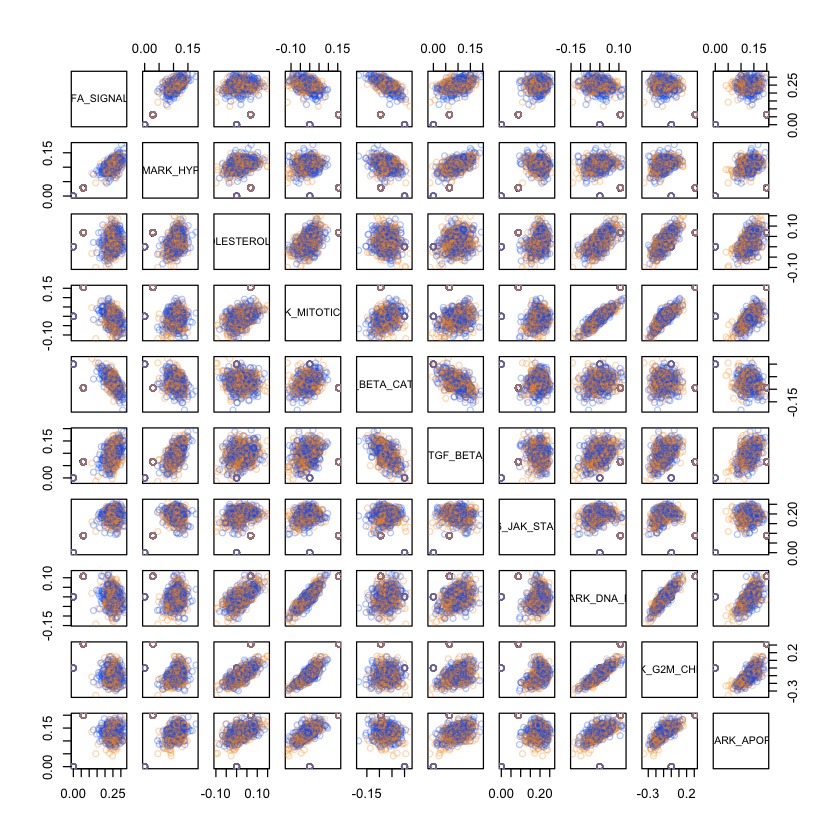

In [37]:
pairs(t(ar.loadings.pcr_boot[[3]][1:10,1,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50))

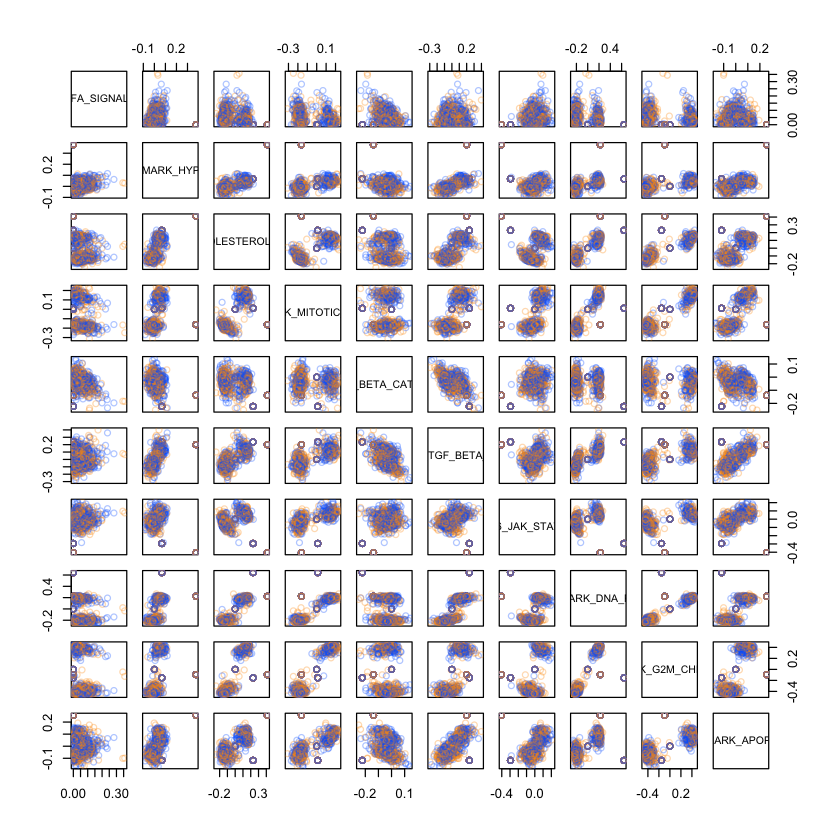

In [38]:
pairs(t(ar.loadings.pcr_boot[[3]][1:10,2,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50))

### Change loading sign when required and match order of the dimension (Method 1)

In [39]:
manipulation1_r_boot = lapply(ar.loadings.pcr_boot,function(x,original){
    
    apply(x,3,function(y,original){ # original = mx.loadings.pc;y = ar.loadings.pcr_boot[[1]][,,1]
    
        # solution:
        # change signs to match
        # for each permutation, calculate sum of squares to define matching loadings 
        out = matrix(t(apply(y,2,function(x,original){ # x=y[,1]            
            score = rbind(apply(original-x,2,function(x)sum(x^2)),
                                apply(original+x,2,function(x)sum(x^2)))            
            score = score==min(score)                                      
            pos   = which(apply(score,2,sum)==1)                                           
            sign  = c(1,-1)[which(apply(score,1,sum)==1)]
                                      c(pos,sign)                                  
                                      },
                                      
                                      original=original)),
                          
                          nrow=ncol(original),
                          ncol=2,
                          dimnames=list(paste0("comp",1:ncol(original)),
                                        c("position","sign")))
            
            as.data.frame(out)
            },
                             
                             original = original)
    },
                       original = mx.loadings_original.pc)

In [40]:
lapply(manipulation1_r_boot,
       function(x)table(unlist(lapply(x,function(x)length(tabulate(x[,1]))))))

$boot0

   3    4    5 
  38 1763 8199 

$boot1

   4    5 
2524 7476 

$boot2

   3    4    5 
 318 2229 7453 


#### COMMENT: duplicated dimension frequent but in low ranks

In [41]:
manipulation1_r_boot[[3]][[1]]

position sign
comp1 1         1  
comp2 2         1  
comp3 5         1  
comp4 3        -1  
comp5 5         1

### Change loading sign when required and match order of the dimension (Method 2)

#### Sensitivity analysis of method 1 (both provide similar results)

In [42]:
.coord = function(n.dk,n.tk){
    
    n.k=length(n.tk)
    if(n.k!=length(n.dk)){stop("coord and dimarray are different length")}
    
    for(k in 1:n.k){if(n.dk[k]>n.tk[k]){stop(cat("in dim", k, "n.dk > n.tk  :"))}}

    # calc
    temp=rep(n.dk[1],n.k)
    for(k in 1:(n.k-1)){temp[k]=prod(n.tk[1:(n.k-k)])*(n.dk[(n.k-k+1)]-1)}
    sum(temp)
    }

In [43]:
permutation = expand.grid(1:n.comp,1:n.comp,1:n.comp,1:n.comp,1:n.comp)

In [44]:
permutation = permutation[apply(permutation,1,function(x)length(unique(x))==n.comp),]

In [45]:
permutation.k = permutation

In [46]:
for(cw in 1:ncol(permutation)){
    permutation.k[,cw] = apply(cbind(permutation[,cw],cw),
                               1,
                               .coord,
                               n.tk=c(ncol(permutation),
                                      ncol(permutation)))
    }

In [47]:
manipulation2_r_boot = lapply(ar.loadings.pcr_boot,function(x,original,p,k,w){
    
    apply(x,3,function(y,original,p,k,w){ # original = mx.loadings.pc;y = ar.loadings.pcr_boot[[1]][,,1]
        
        n.cw = ncol(original)
        
        # cor:
        mx.cor.cc = matrix(NA,n.cw,n.cw)
        
        for(i in 1:n.cw){
            x = y[,i]
            for(j in 1:n.cw){mx.cor.cc[i,j] = cor(x,original[,j],method="pearson")}
            }
        
        # solution:
        # for all permutation, pick the highest weighted correlation mean 
        # (weighted by variance of components)
        crit.perm = apply(matrix(abs(mx.cor.cc)[unlist(k)],ncol=n.cw)*matrix(rep(w,each=nrow(k)),ncol=n.cw),1,sum)
        
        # out
        k.best = which(crit.perm==max(crit.perm))
        
        out = data.frame(position=unlist(p[k.best,]),
                         sign=sign(mx.cor.cc[unlist(k[k.best,])]),
                         corr=mx.cor.cc[unlist(k[k.best,])])
        out                                                                                                      
        },original = original,p=p,k=k,w=w)
        },original = mx.loadings_original.pc,
                              p=permutation,
                              k=permutation.k,
                              w=original_pca$sdev[1:ncol(permutation)]^1/sum(original_pca$sdev[1:ncol(permutation)]^1))

### Use correction method 1 and then delete outliers

In [48]:
ar.loadings_corr.pcr_boot = ar.loadings.pcr_boot

#### Change position and sign of principal components when required

In [49]:
for(bw in 1:n.boot){    
    for(rw in 1:n.R){        
        ar.loadings_corr.pcr_boot[[bw]][,,rw]=ar.loadings.pcr_boot[[bw]][,manipulation1_r_boot[[bw]][[rw]]$position,rw]*rep(manipulation1_r_boot[[bw]][[rw]]$sign[manipulation1_r_boot[[bw]][[rw]]$position],each=n.var) 
        }
} 

### Visualise

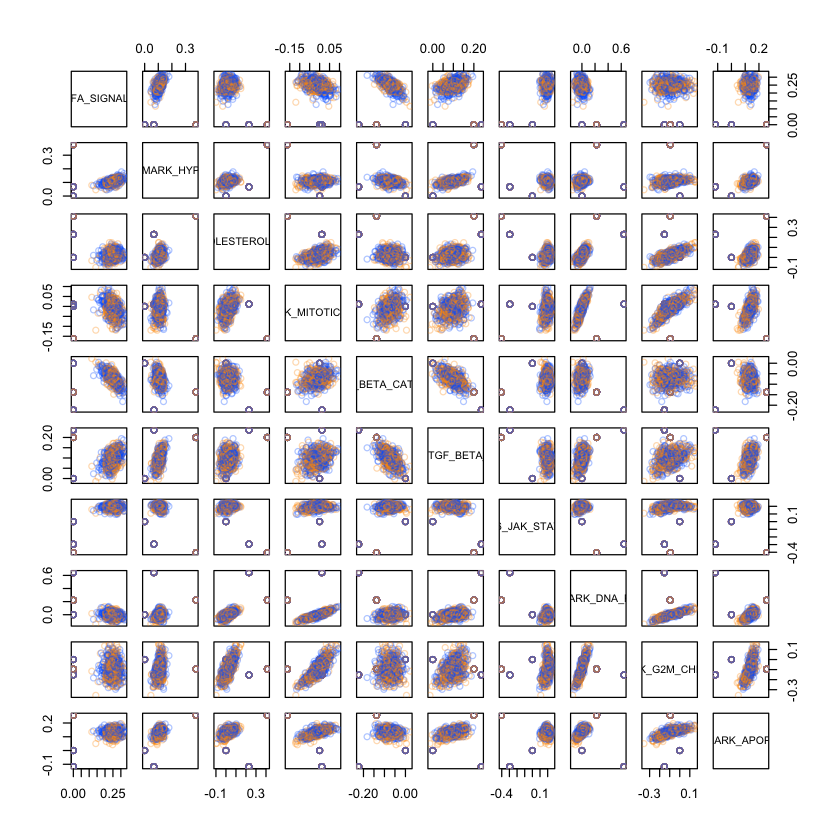

In [50]:
pairs(t(ar.loadings_corr.pcr_boot[[3]][1:10,1,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50))

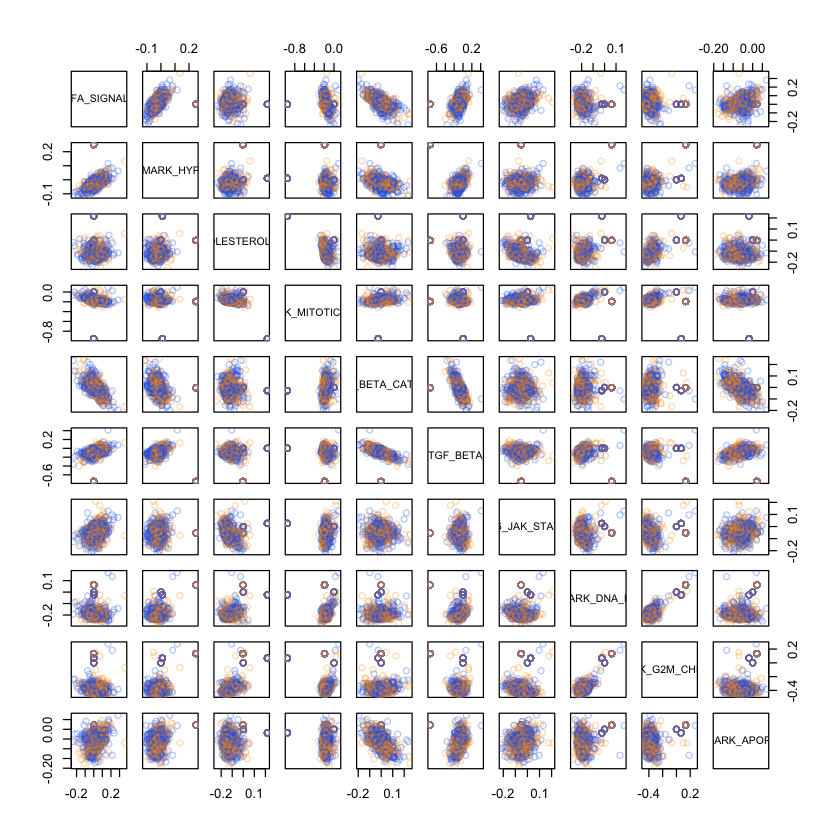

In [51]:
pairs(t(ar.loadings_corr.pcr_boot[[3]][1:10,2,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50))

### COMMENTS:
#### 1) With the correction we see no pattern in the data (as expected) but still there are some outliers that we want to detect and delete, since these are most likely random artefacts of the bootstraps
#### 2) We expect the bivariate distribution of the loadings to be ~ normal, although there is no assumption on the distribution of the loadings themselves for the bootstrap analysis
#### 3) Therefore, the outliers in the bivariate plots, are most likely artefacts

## Use robust estimator analysis to detect outliers

#### Assumption: distribution of bivariate data is aprroximately normal

In [52]:
path.sc = ""
source(paste(path.sc,"covREM.r",sep=""))
source(paste(path.sc,"AttrPsyFunc.r",sep=""))

In [53]:
notoutliers.r_boot = lapply(ar.loadings_corr.pcr_boot,function(x){
    
    apply(apply(x[,1:2,],
                2,
                function(x){
                    covREM(t(x))$w==0
                }),
          1,
          sum)==0
})

Loading required package: robustbase
Warning message in covMcd(complete):
“The covariance matrix of the data is singular.
There are 10000 observations (in the entire dataset of 10000 obs.)
lying on the hyperplane with equation a_1*(x_i1 - m_1) + ... +
a_p*(x_ip - m_p) = 0 with (m_1, ..., m_p) the mean of these
observations and coefficients a_i from the vector a <- c(-0.1868558,
0.0364414, -0.0524368, -0.0270134, -0.2828205, 0.0058595, -0.0945707,
-0.0006318, 0.004526, -0.1299019, 0.0468788, 0.0278225, -0.0026394,
-0.0053208, -0.0517361, 0.0277169, -0.0523711, 0.2231162, -0.0569472,
-0.1303388, -0.0159337, -0.0424955, 0.1432842, -0.0472017, -0.0751712,
-0.0147702, -0.013237, -0.0142226, -0.1376531, 0.2389209, 0.4738443,
0.0285964, -0.0091705, -0.0634003, -0.022606, -0.1366065, -0.0424456,
0.123047, 0.0295361, -0.1200495, 0.0689403, 0.1938386, 0.0006803,
0.0012323, -0.0764644, 0.0286472, -0.0029888, 0.2532863, 0.1239983,
-0.183919, -0.0788019, -0.4676489, 3.6e-05 )”Warning message:
“No m

### Check manipulation results: 
#### For dim1 and 2, compare ORIGINAL loadings versus CORRECTED ONES

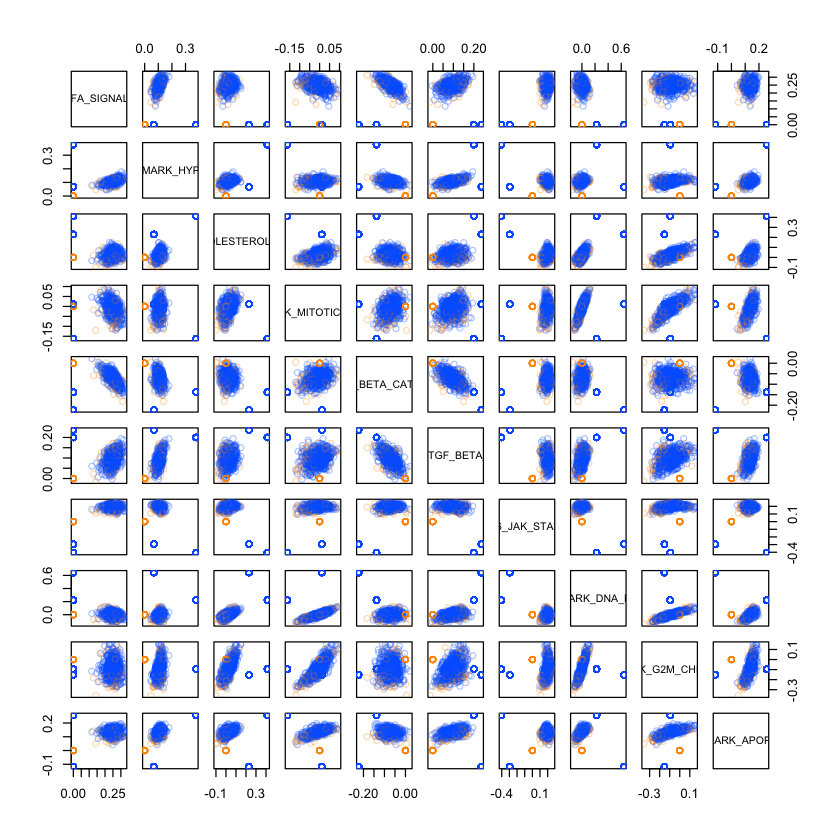

In [54]:
pairs(t(ar.loadings_corr.pcr_boot[[3]][1:10,1,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50)[as.numeric(notoutliers.r_boot[[3]])+1])

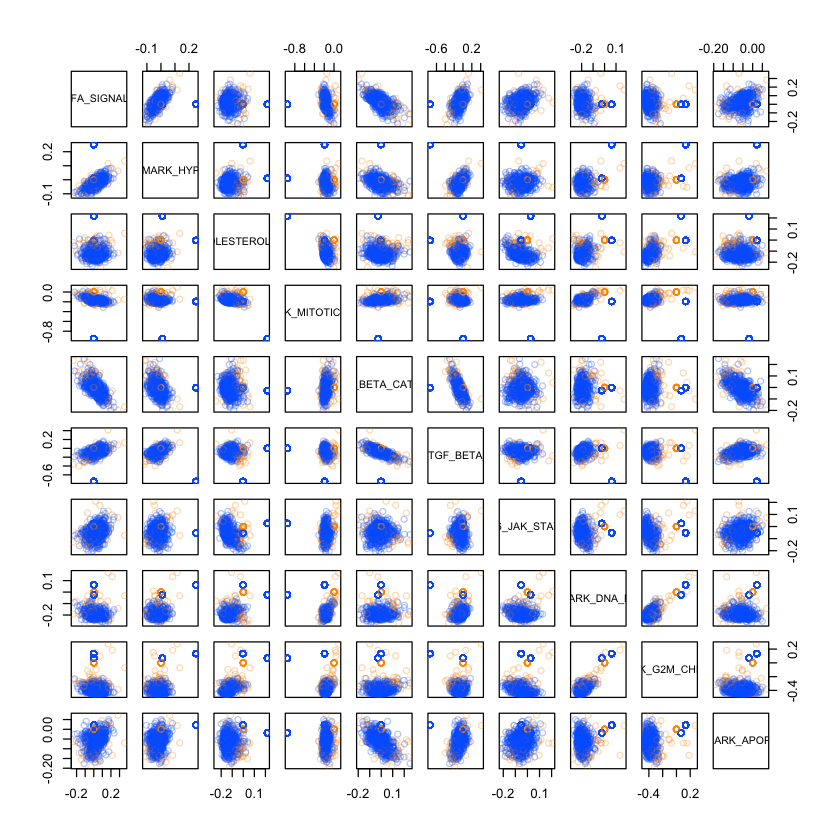

In [55]:
pairs(t(ar.loadings_corr.pcr_boot[[3]][1:10,2,1:1000]),
      col=paste0(substr(rainbow(10)[c(2,7)],1,7),50)[as.numeric(notoutliers.r_boot[[3]])+1])

### COMMENT:
#### Robust estimator detected the outliers

## Compare bootstrap methods a, b, and c, and evaluate feature categories differences

### For bootstrap 3: mean loading values per group of variable

In [56]:
ar.mean.rtdb = array(NA,dim=c(n.R,n.type,2,n.boot),
                     dimnames=list(1:n.R,id.type$id,paste0("comp.",1:2),id.boot$id))

In [57]:
for(bw in 1:n.boot){# bw = tw = rw = 3
    for(rw in 1:n.R){
        ar.mean.rtdb[rw,,,bw] = apply(as.data.frame(ar.loadings_corr.pcr_boot[[bw]][,1:2,rw]),2,function(x)sapply(split(x,id.var$type),mean)) 
        }
   cat(".\n")   
}              

.
.
.


### Define 95% bootstrap confidence interval

In [58]:
ar.loadings.2tcb = apply(ar.mean.rtdb[,,,],2:4,quantile,prob=c(.025,.975))

### Plot

Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(tw + c(-0.1, 0, 0.1)[bw], ar.loadings.2tcb[1, tw, dimw, :
“zero-length arrow is of indeterminate angle and so skipped”

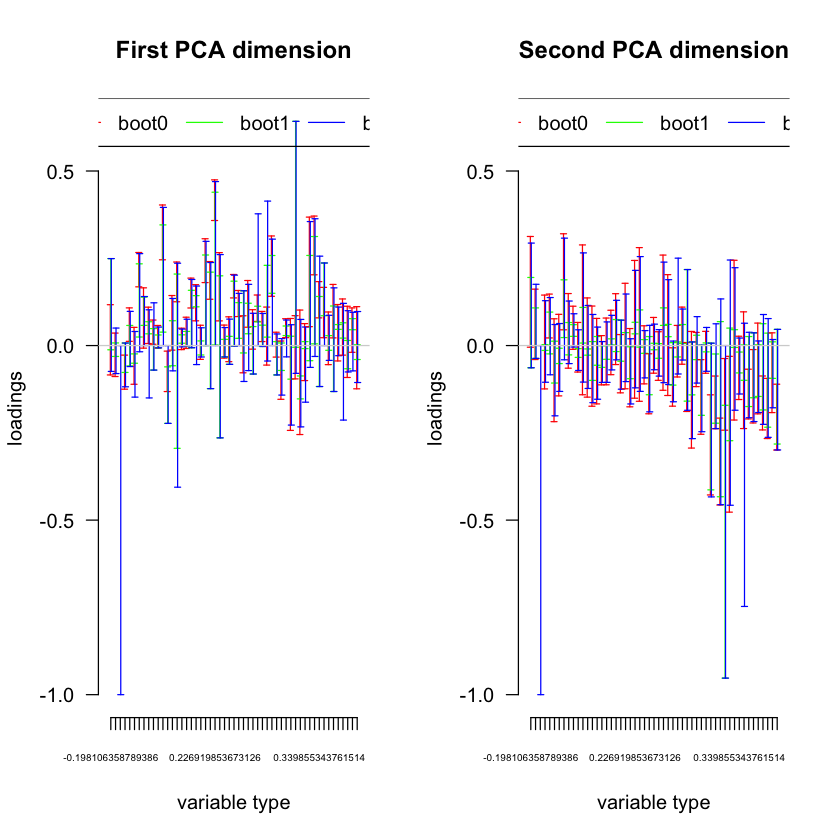

In [59]:
par(mfrow=c(1,2))

# dimension 1:
dimw = 1

plot(1,1,pch="",xlim=c(1,n.type)+c(-.5,+.5),ylim=range(ar.loadings.2tcb),
    axes=FALSE,ylab="loadings",xlab="variable type",main="First PCA dimension")

axis(2,las=2)
axis(1,1:n.type,id.type$id,cex.axis=.5)

for(tw in 1:n.type){
    for(bw in 1:n.boot){
        arrows(tw+c(-.1,0,.1)[bw],ar.loadings.2tcb[1,tw,dimw,bw],tw+c(-.1,0,.1)[bw],ar.loadings.2tcb[2,tw,dimw,bw],angle=90,length=.025,code=3,col=rainbow(n.boot)[bw])
        }
    }

abline(h=0,col="light gray")    
legend("top",ncol=n.boot,id.boot$id,lty=rep(1,n.boot),col=rainbow(n.boot))

# dimension 2:
dimw = 2
plot(1,1,pch="",xlim=c(1,n.type)+c(-.5,+.5),ylim=range(ar.loadings.2tcb),
    axes=FALSE,ylab="loadings",xlab="variable type",main="Second PCA dimension")

axis(2,las=2)
axis(1,1:n.type,id.type$id,cex.axis=.5)

for(tw in 1:n.type){
    for(bw in 1:n.boot){
        arrows(tw+c(-.1,0,.1)[bw],ar.loadings.2tcb[1,tw,dimw,bw],tw+c(-.1,0,.1)[bw],ar.loadings.2tcb[2,tw,dimw,bw],angle=90,length=.025,code=3,col=rainbow(n.boot)[bw])
        }
    }

abline(h=0,col="light gray")    
legend("top",ncol=n.boot,id.boot$id,lty=rep(1,n.boot),col=rainbow(n.boot))